# Classification supervisée

# Importation librairies primaires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [380]:
conda list python

# packages in environment at C:\Users\ARMAN\anaconda3\envs\projet_6_OC:
#
# Name                    Version                   Build  Channel
brotli-python             1.0.9            py38hd77b12b_7  
google-api-python-client  2.108.0                  pypi_0    pypi
ipython                   8.12.2           py38haa95532_0  
ipython_genutils          0.2.0              pyhd3eb1b0_1  
opencv-python-headless    4.8.1.78                 pypi_0    pypi
python                    3.8.18               h1aa4202_0  
python-dateutil           2.8.2              pyhd3eb1b0_0  
python-fastjsonschema     2.16.2           py38haa95532_0  
python-json-logger        2.0.7            py38haa95532_0  
python-slugify            8.0.1                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [3]:
# on agrandit la fenretre de lecture
pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_colwidth", 250)

# 1) Importation du fichier

In [4]:
# importation dataframe
df = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

In [5]:
# 5 premières données
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal ...",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels ...",No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"", ""value""=>""Face Towel Set""}, {""key""=>""Model Name"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,"Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor)...",No rating available,No rating available,SANTOSH ROYAL 

In [6]:
# 5 dernières données
df.tail()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-large-self-adhesive-sticker/p/itme88zgzgcvtbpx?pid=STIE88ZGTX65GH4V,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers""]",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n Price: Rs. 999\r\n\t\t\t\t\r\n\t\t\tDouble sticker can be used for the big walls. Two pieces is there that can be arranged alternatively or reflectively. This ...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""Sheet Containing Set of Small Stickers""}, {""key""=>""Ideal Use"", ""value""=>""Any place where there is need of ample de..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl-sticker/p/itmec889fxheshyg?pid=STIEC889ZD5GDCVQ,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,"Wallmantra Large Vinyl Sticker Sticker (Pack of 1)\r\n Price: Rs. 1,896\r\n\t\t\t\t\r\n\t\t\tBring home this exclusive Piece of Wall Art to give your home a refreshing look it deserves !\r\nWall Decals are the latest trend...",No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""}, {""key""=>""Sales Package"", ""value""=>""1 Wall Decal/Sticker, 1 Practice Decal, Instructions""}, {""key""=>""Ideal Use"", ""value""=>""Child Bedroom, Bedroom, Liv..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-pigmented-polyvinyl-films-imported-sticker/p/itme5uvggyhfrd4p?pid=STIE5UVGW2JWVWCT,Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers""]",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker for Rs.1449 online. Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replac...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""}, {""key""=>""Sales Package"", ""value""=>""Sticker""}, {""key""=>""Brand"", ""value""=>""Uberlyfe""}, {""key""=>""Type"", ""value""=>""Pigmented Polyvinyl Films (Imported)""}..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-vinyl-sticker/p/itmec889gxdsfhzb?pid=STIEC889ZGFD3RCE,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]",STIEC889ZGFD3RCE,3465.0,1333.0,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,False,Buy Wallmantra Medium Vinyl Sticker Sticker for Rs.1333 online. Wallmantra Medium Vinyl Sticker Sticker at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""}, {""key""=>""Sales Package"", ""value""=>""1 Wall Decal/Sticker, 1 Practice Decal, Instructions""}, {""key""=>""Ideal Use"", ""value""=>""Child Bedroom, Bedroom, Liv..."
1049,f2f027ad6a6df617c9f125173da71e44,2015-12-01 10:15:43 +0000,http://www.flipkart.com/

In [7]:
# lignes aléatoires
df.sample(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
1022,7ec5ac2dea80b6c5e4cfd20eba597d20,2016-03-03 06:06:42 +0000,http://www.flipkart.com/aroma-comfort-polyester-brown-floral-eyelet-long-door-curtain/p/itmefqf6ewktk6rq?pid=CRNEFQF6GZF9ZCZQ,Aroma Comfort Polyester Brown Floral Eyelet Long Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Aroma Comfort Polyester Brown Floral Eyelet Long...""]",CRNEFQF6GZF9ZCZQ,699.0,599.0,7ec5ac2dea80b6c5e4cfd20eba597d20.jpg,False,"Key Features of Aroma Comfort Polyester Brown Floral Eyelet Long Door Curtain Height: 274 cm Width: 4 inch,Specifications of Aroma Comfort Polyester Brown Floral Eyelet Long Door Curtain (274 cm in Height, Pack of 2) General Brand Aroma Comfort D...",No rating available,No rating available,Aroma Comfort,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Aroma Comfort""}, {""key""=>""Designed For"", ""value""=>""Long Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""PATTA""}, {""key""=>""Model ID"", ""value""=>""AC-535""}, {""key""=>""Co..."
891,463492671c5c19316a0fb9fe1c53da48,2015-12-20 08:26:17 +0000,http://www.flipkart.com/lukluck-cotton-bath-towel/p/itmecdbwjbwezczj?pid=BTWECDBWTUETCFCK,LukLuck Cotton Bath Towel,"[""Home Furnishing >> Bath Linen >> Towels""]",BTWECDBWTUETCFCK,1299.0,599.0,463492671c5c19316a0fb9fe1c53da48.jpg,False,"LukLuck Cotton Bath Towel (Bath Towel, Multicolor)\r\n Price: Rs. 599\r\n\t\t\t\t\r\n\t\t\tMade From Fine Quality Material. These Towels Are Soft And Skin-Friendly. The Towels Are Super-Absorbent & Also They Dry Quickly\r\...",5,5,LukLuck,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""stripe""}, {""key""=>""Brand"", ""value""=>""LukLuck""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM"", ""va..."
176,154920adb9d584b55d419227f9b01cc6,2015-12-01 12:40:44 +0000,http://www.flipkart.com/printland-pmr1051-ceramic-mug/p/itmebfgfwn4q9xzj?pid=MUGEBFGFRUMZGKNN,Printland PMR1051 Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Printland Coffee Mugs""]",MUGEBFGFRUMZGKNN,650.0,299.0,154920adb9d584b55d419227f9b01cc6.jpg,False,Printland PMR1051 Ceramic Mug (350 ml)\r\n Price: Rs. 299\r\n\t\t\t\t\r\n\t\t\tPrintland coffee mug is an adorable and a fantastic coffee mug. One can enjoy their morning coffee/tea in this huge mug. It is made of ceramic ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""value""=>""Mug""}, {""key""=>""Mug Capacity"", ""value""=>""350 ml""}, {""key""=>""Material"", ""value""=>""Ceramic""}, {""key""=>""Freezer Safe"", ""value""=>""Yes""}, {""key""=>""Microwave Safe"", ""value""=>""Yes""}, {""key""=>""Weight"",..."
794,aba92798c4b2723e23131478d6c97293,2015-12-12 11:46:53 +0000,http://www.flipkart.com/mxofere-combo-mix-fruit-soap-aloevera-lemon-facewash-kit/p/itmebva8unsajy6y?pid=CBKEBVA8FSYCT7NJ,Mxofere Combo Mix Fruit Soap And Aloevera Lemon Facewash Kit,"[""Beauty and Personal Care >> Combos and Kits >> Mxofere Combos and Kits""]",CBKEBVA8FSYCT7NJ,285.0,285.0,aba92798c4b2723e23131478d6c97293.jpg,False,Buy Mxofere Combo Mix Fruit Soap And Aloevera Lemon Facewash Kit for Rs.285 online. Mxofere Combo Mix Fruit Soap And Aloevera Lemon Facewash Kit at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guara...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Organic Type"", ""value""=>""Natural""}, {""key""=>""Number of Contents in Combo Set"", ""value""=>""6""}, {""key""=>""Combo Set Contents"", ""value""=>""5 Mixfruit Soap, Aloevera Lemon Favewash""}, {""key""=>""Organic"", ""value""=>""Yes..."
928,3f9c4d0e8c3bca9c870e41f5098f90d6,2016-0

In [8]:
# info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [9]:
# valeures uniques
df.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

In [10]:
# valeurs nulles
df.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [11]:
# valeures nulles
df.isnull().mean()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
retail_price               0.000952
discounted_price           0.000952
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
brand                      0.321905
product_specifications     0.000952
dtype: float64

In [12]:
# Lignes dupliquées
df.duplicated().sum()

0

In [13]:
# check colonne 
df['product_rating'].value_counts()

No rating available    889
5                       43
4                       21
3                       12
1                       10
4.5                     10
4.3                      9
3.7                      8
3.5                      8
2                        6
4.1                      4
4.2                      4
3.8                      3
4.4                      3
4.7                      3
2.3                      3
3.6                      3
4.8                      2
2.5                      1
3.2                      1
2.2                      1
4.9                      1
3.3                      1
3.9                      1
3.1                      1
2.7                      1
1.5                      1
Name: product_rating, dtype: int64

In [14]:
# check colonne 
df['overall_rating'].value_counts()

No rating available    889
5                       43
4                       21
3                       12
1                       10
4.5                     10
4.3                      9
3.7                      8
3.5                      8
2                        6
4.1                      4
4.2                      4
3.8                      3
4.4                      3
4.7                      3
2.3                      3
3.6                      3
4.8                      2
2.5                      1
3.2                      1
2.2                      1
4.9                      1
3.3                      1
3.9                      1
3.1                      1
2.7                      1
1.5                      1
Name: overall_rating, dtype: int64

In [15]:
# check colonne 
df['is_FK_Advantage_product'].value_counts()

False    993
True      57
Name: is_FK_Advantage_product, dtype: int64

In [16]:
# check colonne 
df['brand'].value_counts()

PRINT SHAPES          11
Lapguard              11
Lal Haveli            10
Raymond                8
Aroma Comfort          8
                      ..
Rute                   1
NAMS                   1
JewelKraft Designs     1
Budding Bees           1
Zero                   1
Name: brand, Length: 490, dtype: int64

In [17]:
# check colonne 
df[["description", "product_specifications"]]

,description,product_specifications
0,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This...","{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value..."
1,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal ...","{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM..."
2,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels ...","{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"", ""value""=>""Face Towel Set""}, {""key""=>""Model Name"",..."
3,"Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor)...","{""product_specification""=>[{""key""=>""Brand"", ""value""=>""SANTOSH ROYAL FASHION""}, {""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Type"", ""value""=>""Flat""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Model Name"", ""value""=>""Gold Design Roya..."
4,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comf...","{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Brand"", ""value""=>""Jaipur Print""}, {""key""=>""Type"", ""value""=>""Flat""}, {""key""=>""Model Name"", ""value""=>""jaipur117""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Thr..."
...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n Price: Rs. 999\r\n\t\t\t\t\r\n\t\t\tDouble sticker can be used for the big walls. Two pieces is there that can be arranged alternatively or reflectively. This ...,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""Sheet Containing Set of Small Stickers""}, {""key""=>""Ideal Use"", ""value""=>""Any place where there is need of ample de..."
1046,"Wallmantra Large Vinyl Sticker Sticker (Pack of 1)\r\n Price: Rs. 1,896\r\n\t\t\t\t\r\n\t\t\tBring home this exclusive Piece of Wall Art to give your home a refreshing look it deserves !\r\nWall Decals are the latest trend...","{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""}, {""key""=>""Sales Package"", ""value""=>""1 Wall Decal/Sticker, 1 Practice Decal, Instructions""}, {""key""=>""Ideal Use"", ""value""=>""Child Bedroom, Bedroom, Liv..."
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker for Rs.1449 online. Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker at best prices with FREE sh

In [18]:
# check colonne 
df['product_specifications'][0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [19]:
df['product_category_tree'][0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [20]:
# Séléction des colonnes pertinentes
df = df[['product_name','image','product_category_tree']]

In [21]:
df

,product_name,image,product_category_tree
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]"
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]"
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]"
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]"
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...""]"
...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,958f54f4c46b53c8a0a9b8167d9140bc.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers""]"
1046,Wallmantra Large Vinyl Sticker Sticker,fd6cbcc22efb6b761bd564c28928483c.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]"
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker,5912e037d12774bb73a2048f35a00009.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers""]"
1048,Wallmantra Medium Vinyl Sticker Sticker,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]"


In [22]:
# check à nouveau valeur nulles
df.isnull().sum()

product_name             0
image                    0
product_category_tree    0
dtype: int64

# 2) Exploration Data Analyze

In [23]:
import sklearn

In [24]:
import re
import nltk
from sklearn.preprocessing import LabelEncoder

In [25]:
df.head()

,product_name,image,product_category_tree
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]"
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]"
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]"
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]"
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...""]"


In [26]:
# Extraction des catégories
# Suppression caractères ">>"
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x.split(">>"))
# Sélèction de la première valeur
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x[0])
# Supression catactères inutiles
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : re.sub("[\"\[]","",x))

In [27]:
# Comptage
df['product_category_tree'].value_counts()

Home Furnishing                150
Baby Care                      150
Watches                        150
Home Decor & Festive Needs     150
Kitchen & Dining               150
Beauty and Personal Care       150
Computers                      150
Name: product_category_tree, dtype: int64

In [28]:
# check valeurs nulles
df.isnull().sum()

product_name             0
image                    0
product_category_tree    0
dtype: int64

In [29]:
# lignes dupliquées
df["image"].duplicated().sum()

0

In [30]:
df

,product_name,image,product_category_tree
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing
...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care
1046,Wallmantra Large Vinyl Sticker Sticker,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker,5912e037d12774bb73a2048f35a00009.jpg,Baby Care
1048,Wallmantra Medium Vinyl Sticker Sticker,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care


In [31]:
# encodage des catégories avec label encoder

le = LabelEncoder()
df["label_categories"] = le.fit_transform(df["product_category_tree"])
df.head()

,product_name,image,product_category_tree,label_categories
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4


In [32]:
# importation os et lien vers le fichier image
import os
path = "C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 6-Classifiez automatiquement des biens de consommation/Images/"

In [33]:
# liste des images
list_photos_im = [file for file in os.listdir(path)]
print(len(list_photos_im))

1050


In [34]:
# importation bibliothèque image
from matplotlib.image import imread

In [35]:
# fonction de listing et affichage des images

def list_image(category,nb_images,show = True):
    df_temp = df[df["product_category_tree"]==category]
    list_image = df_temp["image"].to_list()
    if show == True :
        print(f"- {category}:")
        for i in np.arange(0,nb_images,1) :
            plt.rcParams["figure.figsize"] = [8,16]
            plt.subplot(1,nb_images,i+1)
            plt.imshow(imread(path + list_image[i]))
            plt.tight_layout()
        plt.show()
    else : return list_image

- Home Furnishing :


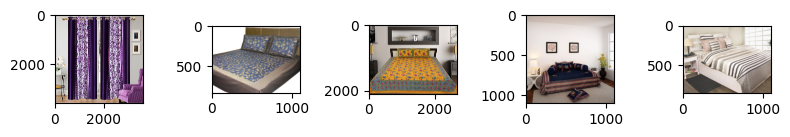

- Baby Care :


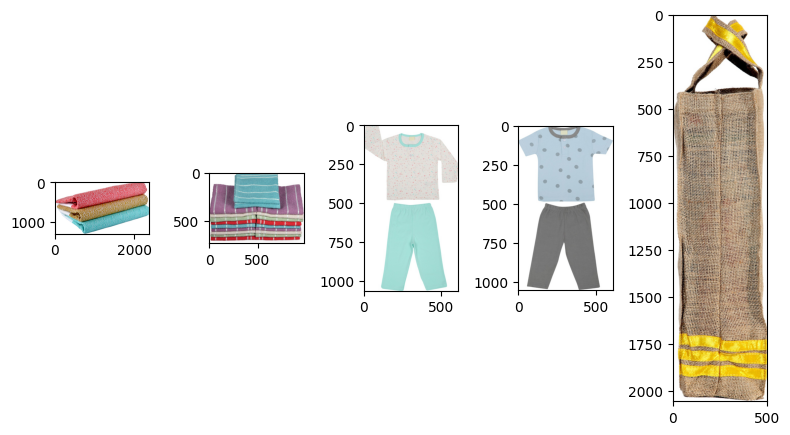

- Watches :


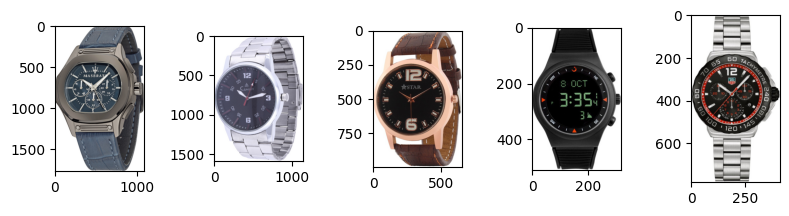

- Home Decor & Festive Needs :


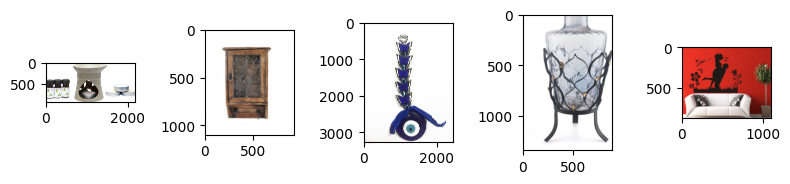

- Kitchen & Dining :


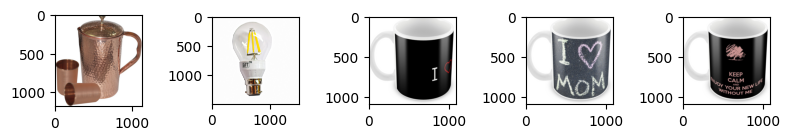

- Beauty and Personal Care :


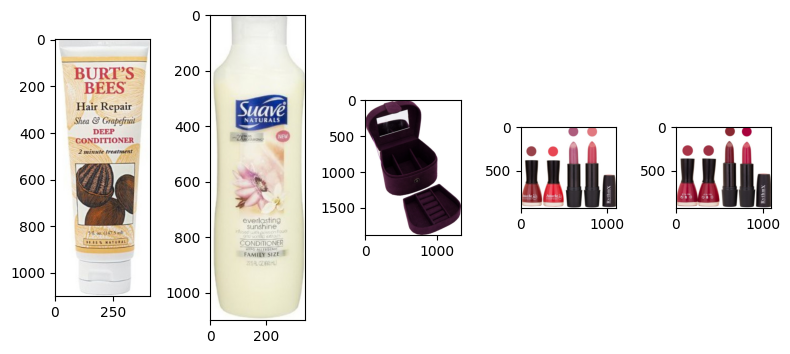

- Computers :


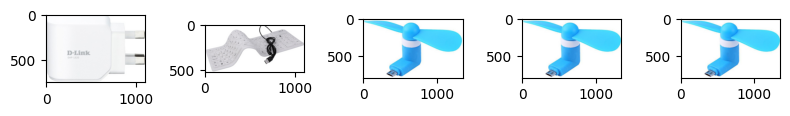

In [36]:
# Affichage des images par catégories
for categorty in df["product_category_tree"].unique() : 
    list_image(categorty, 5, show = True)

In [37]:
df["product_category_tree"].unique()[0]

'Home Furnishing '

In [38]:
# Affichage des images par catégories
list_image(df["product_category_tree"].unique()[0],0,show = False)[0]

'55b85ea15a1536d46b7190ad6fff8ce7.jpg'

# 3) Modélisation transfert learning CNN

In [381]:
import os
from os import listdir

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, confusion_matrix
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

import time

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.optimizers import Adam


## 3.1) sans data augmentation

In [382]:
# modèle de classification
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

In [383]:
# Préparation des images
def image_prep_fct(df) :
    prepared_images = []
    for image_num in range(len(df["image"])) :
        img = load_img(path+df["image"][image_num], target_size=(224,224))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images)
    return prepared_images_np

In [384]:
# Préparation des images
T0 = time.time()
images_np = image_prep_fct(df)
print(images_np.shape)
duration = time.time()-T0
print(f" temps de traitement {duration} secondes")

C:\Users\ARMAN\anaconda3\envs\projet_6_OC\lib\site-packages\PIL\Image.py:3182: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(1050, 224, 224, 3)
 temps de traitement 144.55011916160583 secondes


In [385]:
X = images_np
y = to_categorical(df['label_categories'])

In [386]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_val.shape)

(787, 224, 224, 3)
(263, 224, 224, 3)


In [387]:
# Création du modèle
model1 = create_model_fct()

# Création du callback
model1_save_path1 = "./model1_best_weights.h5"
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [388]:
# entrainement
T0 = time.time()
history1 = model1.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=1, callbacks=callbacks_list)
duration = time.time()-T0
print(f" temps de traitement {duration} secondes")

Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 4.9893 - accuracy: 0.4905
Epoch 1: val_loss improved from inf to 1.50872, saving model to .\model1_best_weights.h5
13/13 [==============================] - 135s 10s/step - loss: 4.9893 - accuracy: 0.4905 - val_loss: 1.5087 - val_accuracy: 0.7414
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 1.8601 - accuracy: 0.6900
Epoch 2: val_loss improved from 1.50872 to 1.27575, saving model to .\model1_best_weights.h5
13/13 [==============================] - 136s 11s/step - loss: 1.8601 - accuracy: 0.6900 - val_loss: 1.2757 - val_accuracy: 0.7909
Epoch 3/5
13/13 [==============================] - ETA: 0s - loss: 1.2513 - accuracy: 0.7573
Epoch 3: val_loss improved from 1.27575 to 1.11482, saving model to .\model1_best_weights.h5
13/13 [==============================] - 135s 11s/step - loss: 1.2513 - accuracy: 0.7573 - val_loss: 1.1148 - val_accuracy: 0.8213
Epoch 4/5
13/13 [==============================] - ET

In [389]:
# Score du dernier epoch
T0 = time.time()
loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print(f"Training Accuracy: {accuracy}")
print("________________")
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print(f"Validation Accuracy: {accuracy}")
duration = time.time()-T0
print("________________")
print(f" temps de traitement {duration} secondes")

25/25 [==============================] - 102s 4s/step - loss: 0.1794 - accuracy: 0.9428
Training Accuracy: 0.9428208470344543
________________
9/9 [==============================] - 33s 4s/step - loss: 0.9607 - accuracy: 0.8289
Validation Accuracy: 0.8288973569869995
________________
 temps de traitement 135.17037916183472 secondes


In [390]:
# Score de l'epoch optimal
T0 = time.time()
# Chargement du modèle
model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print(f"Training Accuracy: {accuracy}")
print("________________")
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print(f"Validation Accuracy: {accuracy}")
duration = time.time()-T0
print("________________")
print(f" temps de traitement {duration} secondes")

25/25 [==============================] - 100s 4s/step - loss: 0.1794 - accuracy: 0.9428
Training Accuracy: 0.9428208470344543
________________
9/9 [==============================] - 33s 4s/step - loss: 0.9607 - accuracy: 0.8289
Validation Accuracy: 0.8288973569869995
________________
 temps de traitement 132.98548126220703 secondes


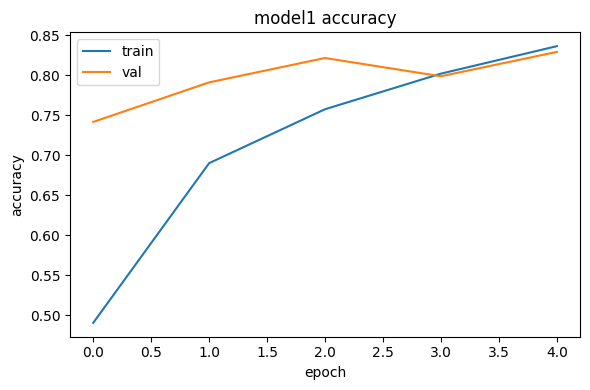

In [391]:
# model accuracy
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title(f'model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.tight_layout()
plt.show()

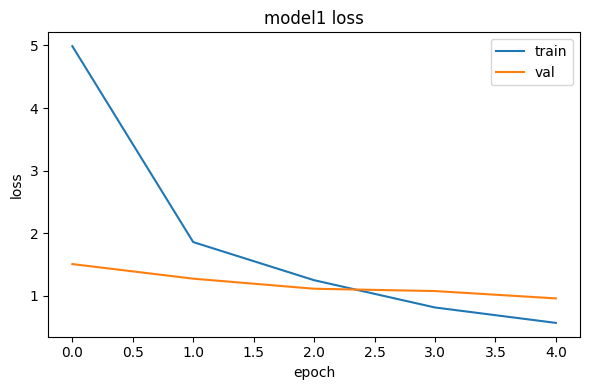

In [392]:
# model loss
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title(f'model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.tight_layout()
plt.show()

In [393]:
# Matrice de confusion sur val set

y_val_pred = np.argmax(model1.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)

9/9 [==============================] - 33s 4s/step


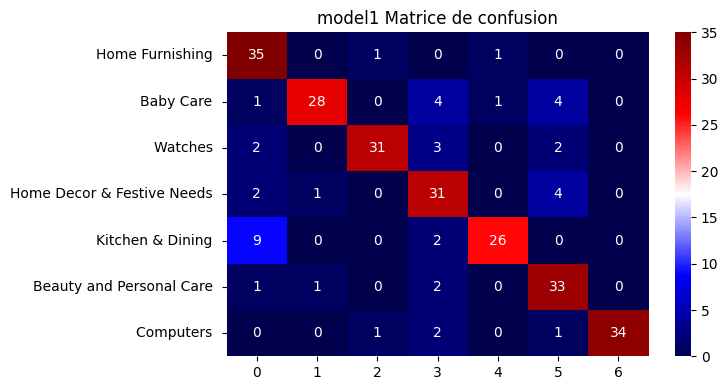

In [394]:
conf_mat = confusion_matrix(y_val_num, y_val_pred)
df_cm = pd.DataFrame(conf_mat, index = [label for label in df["product_category_tree"].unique()],
                  columns = [i for i in "0123456"])
plt.rcParams["figure.figsize"] = [6,4]
plt.title(f'model1 Matrice de confusion')
plt.tight_layout()
sns.heatmap(df_cm, annot=True, cmap = "seismic")
plt.show()

## 3.2) Avec data augmentation

### 3.2.1) Data augmentation dans le modèle

In [395]:
# modèle de classification
def create_model_fct2() :
    # Data augmentation
    data_augmentation = Sequential([
        RandomFlip("horizontal", input_shape=(224, 224, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1)])
    
    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    model = Sequential([
                data_augmentation,
                Rescaling(1./127.5, offset=-1),
                model_base,
                GlobalAveragePooling2D(),
                Dense(256, activation='relu'),
                Dropout(0.5),
                Dense(7, activation='softmax')])

    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

    print(model.summary())
    
    return model

In [396]:
# Préparation de l'image
def image_prep_fct(df) :
    prepared_images = []
    for image_num in range(len(df["image"])) :
        img = load_img(path+df["image"][image_num], target_size=(224,224))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images)
    return prepared_images_np

In [397]:
# Préparation des images
T0 = time.time()
images_np = image_prep_fct(df)
print(images_np.shape)
duration = time.time()-T0
print(f" temps de traitement {duration} secondes")

C:\Users\ARMAN\anaconda3\envs\projet_6_OC\lib\site-packages\PIL\Image.py:3182: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(1050, 224, 224, 3)
 temps de traitement 144.79353070259094 secondes


In [398]:
X = images_np
y = to_categorical(df['label_categories'])

In [399]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_val.shape)

(787, 224, 224, 3)
(263, 224, 224, 3)


In [400]:
# Création du modèle
model2 = create_model_fct2()

# Création du callback
model2_save_path2 = "./model2_best_weights.h5"
checkpoint = ModelCheckpoint(model2_save_path2, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_17  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                     

In [401]:
# entrainement
T0 = time.time()
history2 = model2.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=1, callbacks=callbacks_list)
duration = time.time()-T0
print(f" temps de traitement {duration} secondes")

Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 1.9743 - accuracy: 0.2147
Epoch 1: val_loss improved from inf to 1.46997, saving model to .\model2_best_weights.h5
13/13 [==============================] - 141s 11s/step - loss: 1.9743 - accuracy: 0.2147 - val_loss: 1.4700 - val_accuracy: 0.6388
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 1.4508 - accuracy: 0.4981
Epoch 2: val_loss improved from 1.46997 to 1.14589, saving model to .\model2_best_weights.h5
13/13 [==============================] - 139s 11s/step - loss: 1.4508 - accuracy: 0.4981 - val_loss: 1.1459 - val_accuracy: 0.7529
Epoch 3/5
13/13 [==============================] - ETA: 0s - loss: 1.1901 - accuracy: 0.6213
Epoch 3: val_loss improved from 1.14589 to 0.95095, saving model to .\model2_best_weights.h5
13/13 [==============================] - 139s 11s/step - loss: 1.1901 - accuracy: 0.6213 - val_loss: 0.9510 - val_accuracy: 0.7452
Epoch 4/5
13/13 [==============================] - ET

In [402]:
# Score du dernier epoch
T0 = time.time()
loss, accuracy = model2.evaluate(X_train, y_train, verbose=True)
print(f"Training Accuracy: {accuracy}")
print("________________")
loss, accuracy = model2.evaluate(X_val, y_val, verbose=True)
print(f"Validation Accuracy: {accuracy}")
duration = time.time()-T0
print("________________")
print(f" temps de traitement {duration} secondes")

25/25 [==============================] - 103s 4s/step - loss: 0.7054 - accuracy: 0.8132
Training Accuracy: 0.8132147192955017
________________
9/9 [==============================] - 34s 4s/step - loss: 0.7955 - accuracy: 0.7795
Validation Accuracy: 0.7794677019119263
________________
 temps de traitement 136.42695331573486 secondes


In [403]:
# Score de l'epoch optimal
T0 = time.time()
# Chargement du modèle
model2.load_weights(model2_save_path2)

loss, accuracy = model2.evaluate(X_train, y_train, verbose=True)
print(f"Training Accuracy: {accuracy}")
print("________________")
loss, accuracy = model2.evaluate(X_val, y_val, verbose=True)
print(f"Validation Accuracy: {accuracy}")
duration = time.time()-T0
print("________________")
print(f" temps de traitement {duration} secondes")

25/25 [==============================] - 102s 4s/step - loss: 0.7054 - accuracy: 0.8132
Training Accuracy: 0.8132147192955017
________________
9/9 [==============================] - 34s 4s/step - loss: 0.7955 - accuracy: 0.7795
Validation Accuracy: 0.7794677019119263
________________
 temps de traitement 135.8324363231659 secondes


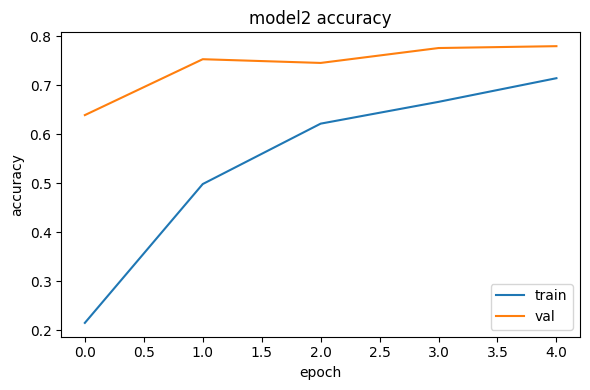

In [404]:
# model accuracy
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title(f'model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.tight_layout()
plt.show()

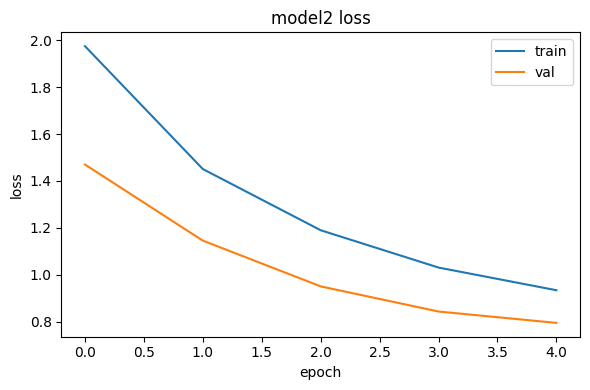

In [405]:
# model loss
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title(f'model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.tight_layout()
plt.show()

In [406]:
# Matrice de confusion sur val set
y_val_pred = np.argmax(model2.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)

9/9 [==============================] - 34s 4s/step


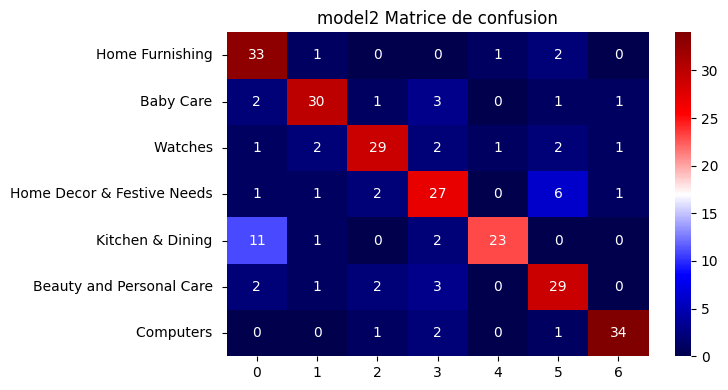

In [407]:
conf_mat = confusion_matrix(y_val_num, y_val_pred)
df_cm = pd.DataFrame(conf_mat, index = [label for label in df["product_category_tree"].unique()],
                  columns = [i for i in "0123456"])
plt.rcParams["figure.figsize"] = [6,4]
plt.title(f'model2 Matrice de confusion')
plt.tight_layout()
sns.heatmap(df_cm, annot=True, cmap = "seismic")
plt.show()

### 3.2.2) Image Data Generator

In [408]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

In [409]:
# Création du path dans de datadrame
df["image_path"] = df["image"].apply(lambda x : path + x)
df.head()

,product_name,image,product_category_tree,label_categories,image_path
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 6-Classifiez automatiquement des biens de consommation/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 6-Classifiez automatiquement des biens de consommation/Images/7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 6-Classifiez automatiquement des biens de consommation/Images/64d5d4a258243731dc7bbb1eef49ad74.jpg
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 6-Classifiez automatiquement des biens de consommation/Images/d4684dcdc759dd9cdf41504698d737d8.jpg
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 6-Classifiez automatiquement des biens de consommation/Images/6325b6870c54cd47be6ebfbffa620ec7.jpg


In [410]:
# fonction d'extraction à partir d'un dataframe
batch_size = 32
def data_flow_fct(data, datagen, data_type=None) :
    data_flow = datagen.flow_from_dataframe(data, directory='',
                                x_col="image_path", y_col='product_category_tree',
                                weight_col=None, target_size=(256, 256),
                                classes=None, class_mode='categorical',
                                batch_size=batch_size, shuffle=True, seed=0,
                                subset=data_type)
    return data_flow

In [411]:
datagen_train = ImageDataGenerator(
featurewise_center=False,
featurewise_std_normalization=False,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,
validation_split=0.25,
preprocessing_function=preprocess_input)

train_flow = data_flow_fct(df, datagen_train, data_type='training')
val_flow = data_flow_fct(df, datagen_train, data_type='validation')

Found 788 validated image filenames belonging to 7 classes.
Found 262 validated image filenames belonging to 7 classes.


In [412]:
# Création du modèle
model3 = create_model_fct()

# Création du callback
model3_save_path3 = "./model3_best_weights.h5"
checkpoint = ModelCheckpoint(model3_save_path3, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [413]:
# entrainement
T0 = time.time()
history3 = model3.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=1, callbacks=callbacks_list)
duration = time.time()-T0
print(f" temps de traitement {duration} secondes")

Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 4.9216 - accuracy: 0.4765
Epoch 1: val_loss improved from inf to 1.93725, saving model to .\model3_best_weights.h5
13/13 [==============================] - 138s 11s/step - loss: 4.9216 - accuracy: 0.4765 - val_loss: 1.9373 - val_accuracy: 0.7224
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 1.8610 - accuracy: 0.7179
Epoch 2: val_loss improved from 1.93725 to 1.27311, saving model to .\model3_best_weights.h5
13/13 [==============================] - 137s 11s/step - loss: 1.8610 - accuracy: 0.7179 - val_loss: 1.2731 - val_accuracy: 0.7871
Epoch 3/5
13/13 [==============================] - ETA: 0s - loss: 1.2309 - accuracy: 0.7649
Epoch 3: val_loss improved from 1.27311 to 1.01307, saving model to .\model3_best_weights.h5
13/13 [==============================] - 137s 11s/step - loss: 1.2309 - accuracy: 0.7649 - val_loss: 1.0131 - val_accuracy: 0.8099
Epoch 4/5
13/13 [==============================] - ET

In [414]:
# Score du dernier epoch
T0 = time.time()
loss, accuracy = model3.evaluate(X_train, y_train, verbose=True)
print(f"Training Accuracy: {accuracy}")
print("________________")
loss, accuracy = model3.evaluate(X_val, y_val, verbose=True)
print(f"Validation Accuracy: {accuracy}")
duration = time.time()-T0
print("________________")
print(f" temps de traitement {duration} secondes")

25/25 [==============================] - 103s 4s/step - loss: 0.1488 - accuracy: 0.9454
Training Accuracy: 0.9453621506690979
________________
9/9 [==============================] - 34s 4s/step - loss: 0.9581 - accuracy: 0.8289
Validation Accuracy: 0.8288973569869995
________________
 temps de traitement 136.58144426345825 secondes


In [415]:
# Score de l'epoch optimal
T0 = time.time()
# Chargement du modèle
model3.load_weights(model3_save_path3)

loss, accuracy = model3.evaluate(X_train, y_train, verbose=True)
print(f"Training Accuracy: {accuracy}")
print("________________")
loss, accuracy = model3.evaluate(X_val, y_val, verbose=True)
print(f"Validation Accuracy: {accuracy}")
duration = time.time()-T0
print("________________")
print(f" temps de traitement {duration} secondes")

25/25 [==============================] - 103s 4s/step - loss: 0.2182 - accuracy: 0.9365
Training Accuracy: 0.9364675879478455
________________
9/9 [==============================] - 34s 4s/step - loss: 0.8618 - accuracy: 0.8137
Validation Accuracy: 0.8136882185935974
________________
 temps de traitement 136.7473442554474 secondes


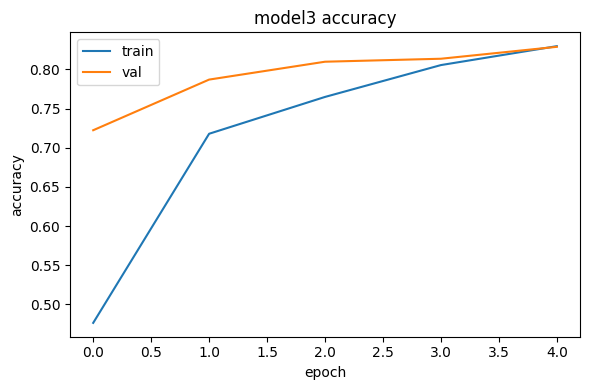

In [416]:
# model accuracy
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title(f'model3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.tight_layout()
plt.show()

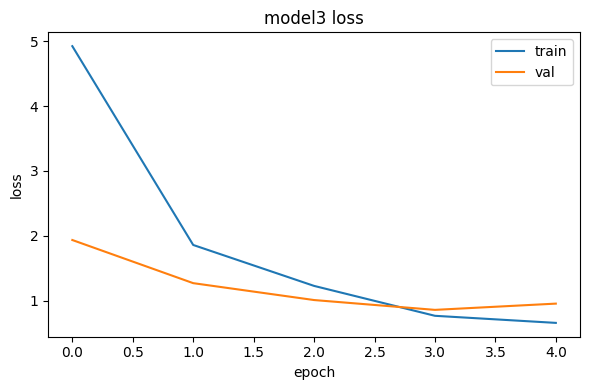

In [417]:
# model loss
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title(f'model3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.tight_layout()
plt.show()

In [418]:
# Matrice de confusion sur val set
y_val_pred = np.argmax(model3.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)

9/9 [==============================] - 36s 4s/step


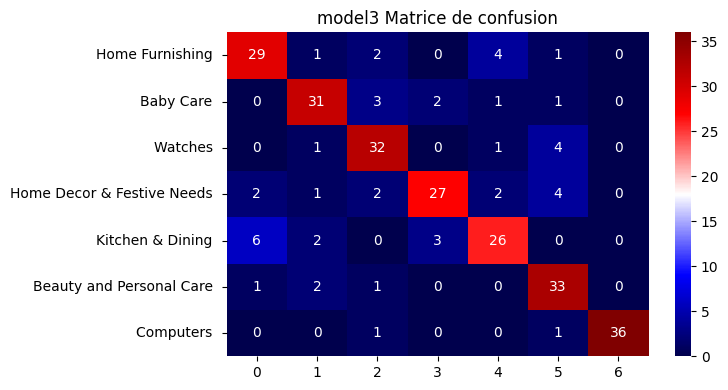

In [419]:
conf_mat = confusion_matrix(y_val_num, y_val_pred)
df_cm = pd.DataFrame(conf_mat, index = [label for label in df["product_category_tree"].unique()],
                  columns = [i for i in "0123456"])
plt.rcParams["figure.figsize"] = [6,4]
plt.title(f'model3 Matrice de confusion')
plt.tight_layout()
sns.heatmap(df_cm, annot=True, cmap = "seismic")
plt.show()

### 3.2.3) Image data generator & RESNET50

In [420]:
# modèle de classification
def create_model_fct_3() :
    # Récupération modèle pré-entraîné
    model0 = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

In [421]:
datagen_train = ImageDataGenerator(
featurewise_center=False,
featurewise_std_normalization=False,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,
validation_split=0.25,
preprocessing_function=preprocess_input)

train_flow = data_flow_fct(df, datagen_train, data_type='training')
val_flow = data_flow_fct(df, datagen_train, data_type='validation')

Found 788 validated image filenames belonging to 7 classes.
Found 262 validated image filenames belonging to 7 classes.


In [422]:
# Création du modèle
model4 = create_model_fct_3()

# Création du callback
model4_save_path4 = "./model4_best_weights.h5"
checkpoint = ModelCheckpoint(model4_save_path4, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_20[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [423]:
# entrainement
T0 = time.time()
history4 = model4.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=1, callbacks=callbacks_list)
duration = time.time()-T0
print(f" temps de traitement {duration} secondes")

Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 1.8225 - accuracy: 0.5781
Epoch 1: val_loss improved from inf to 0.58775, saving model to .\model4_best_weights.h5
13/13 [==============================] - 56s 4s/step - loss: 1.8225 - accuracy: 0.5781 - val_loss: 0.5877 - val_accuracy: 0.8099
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 0.5739 - accuracy: 0.8145
Epoch 2: val_loss improved from 0.58775 to 0.56778, saving model to .\model4_best_weights.h5
13/13 [==============================] - 54s 4s/step - loss: 0.5739 - accuracy: 0.8145 - val_loss: 0.5678 - val_accuracy: 0.8099
Epoch 3/5
13/13 [==============================] - ETA: 0s - loss: 0.5133 - accuracy: 0.8297
Epoch 3: val_loss improved from 0.56778 to 0.47380, saving model to .\model4_best_weights.h5
13/13 [==============================] - 55s 4s/step - loss: 0.5133 - accuracy: 0.8297 - val_loss: 0.4738 - val_accuracy: 0.8555
Epoch 4/5
13/13 [==============================] - ETA: 0s 

In [424]:
# Score du dernier epoch
T0 = time.time()
loss, accuracy = model4.evaluate(X_train, y_train, verbose=True)
print(f"Training Accuracy: {accuracy}")
print("________________")
loss, accuracy = model4.evaluate(X_val, y_val, verbose=True)
print(f"Validation Accuracy: {accuracy}")
duration = time.time()-T0
print("________________")
print(f" temps de traitement {duration} secondes")

25/25 [==============================] - 42s 2s/step - loss: 0.1267 - accuracy: 0.9670
Training Accuracy: 0.9669631719589233
________________
9/9 [==============================] - 14s 2s/step - loss: 0.6150 - accuracy: 0.8289
Validation Accuracy: 0.8288973569869995
________________
 temps de traitement 55.90789532661438 secondes


In [425]:
# Score de l'epoch optimal
T0 = time.time()
# Chargement du modèle
model4.load_weights(model4_save_path4)

loss, accuracy = model4.evaluate(X_train, y_train, verbose=True)
print(f"Training Accuracy: {accuracy}")
print("________________")
loss, accuracy = model4.evaluate(X_val, y_val, verbose=True)
print(f"Validation Accuracy: {accuracy}")
duration = time.time()-T0
print("________________")
print(f" temps de traitement {duration} secondes")

25/25 [==============================] - 41s 2s/step - loss: 0.1826 - accuracy: 0.9441
Training Accuracy: 0.9440914988517761
________________
9/9 [==============================] - 14s 2s/step - loss: 0.4738 - accuracy: 0.8555
Validation Accuracy: 0.855513334274292
________________
 temps de traitement 55.57683229446411 secondes


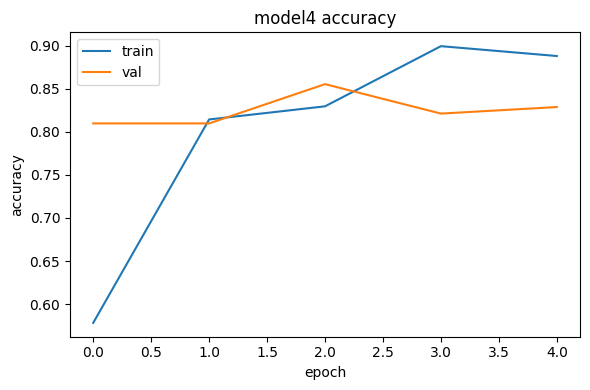

In [426]:
# model accuracy
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title(f'model4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.tight_layout()
plt.show()

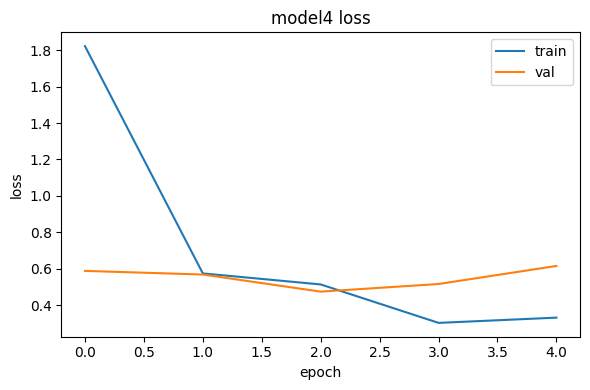

In [427]:
# model loss
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title(f'model4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.tight_layout()
plt.show()

In [428]:
# Matrice de confusion sur val set
y_val_pred = np.argmax(model4.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)

9/9 [==============================] - 14s 2s/step


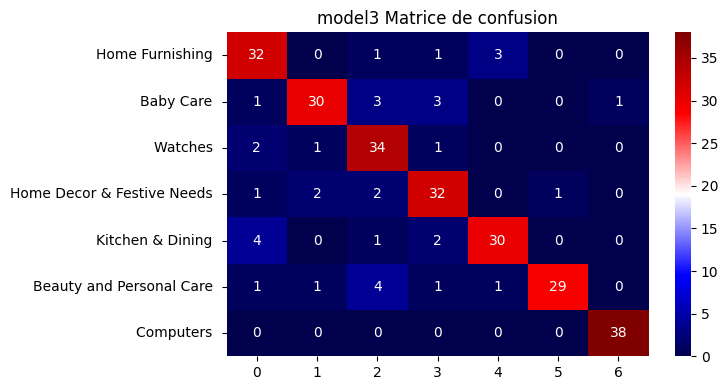

In [429]:
conf_mat = confusion_matrix(y_val_num, y_val_pred)
df_cm = pd.DataFrame(conf_mat, index = [label for label in df["product_category_tree"].unique()],
                  columns = [i for i in "0123456"])
plt.rcParams["figure.figsize"] = [6,4]
plt.title(f'model3 Matrice de confusion')
plt.tight_layout()
sns.heatmap(df_cm, annot=True, cmap = "seismic")
plt.show()